# EDA on the training data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")
%matplotlib inline
%run -i ./Data_Processing/feature_info.py

In [2]:
training_data = pd.read_csv('./Datasets/training_data_full.csv')

## Total population represented in this dataset:

In [3]:
population_represented = training_data['Population_2017'].sum()
print(f'{round(population_represented / 10**6, 2)} million people represented')

102.74 million people represented


# Distribution of the target variable

In [4]:
training_data.head(3)

,StateAbbr,StateDesc,CityName,CountyFIPS,TractFIPS,Population_2017,Unemployment_trend,Unemployment_rate_2017,OBESITY_2017,OBESITY_trend,...,HIGHCHOL_trend,CHD_2017,CHD_trend,COPD_2017,COPD_trend,LPA_2017,LPA_trend,BPMED_2017,BPMED_trend,diabetes_change_rate_2020
0,AL,Alabama,Birmingham,1073,1073000100,3042,-0.22807,4.4,46.4,-0.019027,...,-0.126238,7.8,-0.037037,11.3,0.036697,44.0,0.040189,77.8,-0.027500,0.097701
1,AL,Alabama,Birmingham,1073,1073000300,2735,-0.22807,4.4,47.8,0.006316,...,-0.113253,8.6,0.036145,11.9,0.101852,47.5,0.065022,78.5,-0.022416,0.101010
2,AL,Alabama,Birmingham,1073,1073000400,3338,-0.22807,4.4,45.7,-0.031780,...,-0.158392,7.5,-0.062500,10.5,0.019417,43.0,0.014151,79.4,-0.031707,0.027174


#### Seems like a pretty big spread of the target variable. A lot of tracts stayed around the same, whiel some changed pretty dramatically

Text(-3.8055555555555554, 0.5, 'Number of Census Tracts')

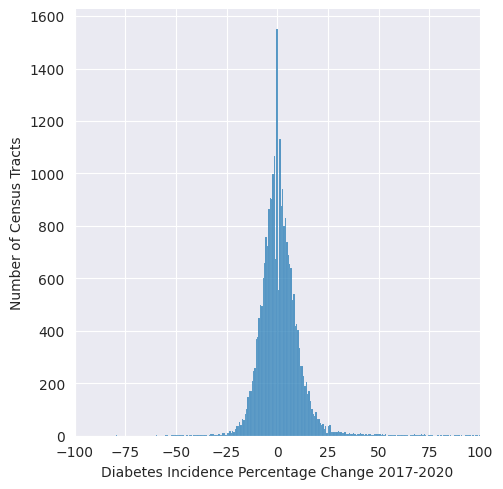

In [6]:
sns.displot(100 * training_data['diabetes_change_rate_2020'])
plt.xlim([-100,100])
plt.xlabel('Diabetes Incidence Percentage Change 2017-2020')
plt.ylabel('Number of Census Tracts')

# Check for collinearities in the numerical features

### Makes sense that a lot of the features related to cardiovascular health are pretty highly correlated.
### Such as Diabetes with COPD ( Chronic obstructure pulmonary disease) as well as Stroke incidence

In [10]:
non_numerical_features = set([
    'StateAbbr',
    'StateDesc',
    'CityName',
    'CountyFIPS',
    'TractFIPS'
])

target_features = set([
    'diabetes_change_rate_2020'
])

numerical_features = set(training_data.columns) - non_numerical_features - target_features
numerical_features

{'ACCESS2_2017',
 'ACCESS2_trend',
 'ARTHRITIS_2017',
 'ARTHRITIS_trend',
 'BINGE_2017',
 'BINGE_trend',
 'BPHIGH_2017',
 'BPHIGH_trend',
 'BPMED_2017',
 'BPMED_trend',
 'CANCER_2017',
 'CANCER_trend',
 'CASTHMA_2017',
 'CASTHMA_trend',
 'CHD_2017',
 'CHD_trend',
 'CHECKUP_2017',
 'CHECKUP_trend',
 'CHOLSCREEN_2017',
 'CHOLSCREEN_trend',
 'COPD_2017',
 'COPD_trend',
 'CSMOKING_2017',
 'CSMOKING_trend',
 'DIABETES_2017',
 'DIABETES_trend',
 'HIGHCHOL_2017',
 'HIGHCHOL_trend',
 'KIDNEY_2017',
 'KIDNEY_trend',
 'LPA_2017',
 'LPA_trend',
 'MHLTH_2017',
 'MHLTH_trend',
 'OBESITY_2017',
 'OBESITY_trend',
 'PHLTH_2017',
 'PHLTH_trend',
 'Population_2017',
 'STROKE_2017',
 'STROKE_trend',
 'Unemployment_rate_2017',
 'Unemployment_trend'}

/tmp/ipykernel_16361/3164012346.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  corr_map = training_data[numerical_features].corr()


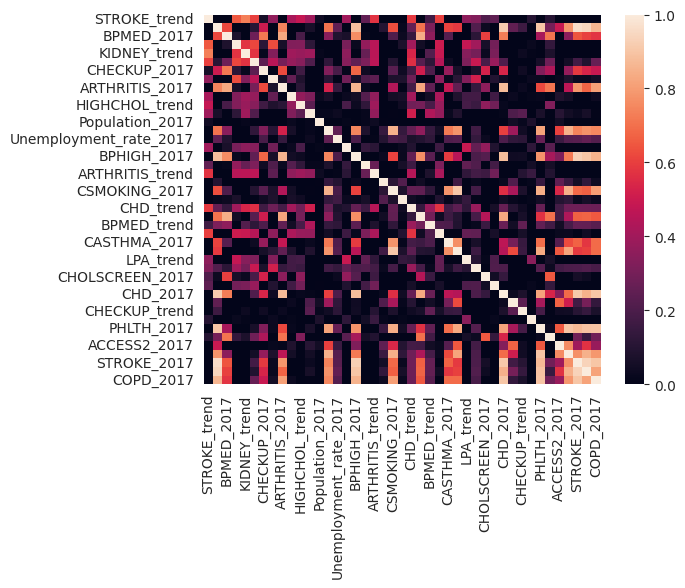

In [11]:
corr_map = training_data[numerical_features].corr()
sns.heatmap(corr_map, vmin=0, vmax=1);

## The Cardiovascular features are pretty strongly correlated with each other:

During modeling these should be combined into 1 or 2 columns

In [14]:
cardiovascular_features = [
    'COPD_2017', # Chronic obstructure pulmonary disease
    'STROKE_2017', # Stroke incidence
    'LPA_2017', # Low Physical Activity
    'BPHIGH_2017', # High BP Incidence
    'KIDNEY_2017' # Chronic kidney disease
]

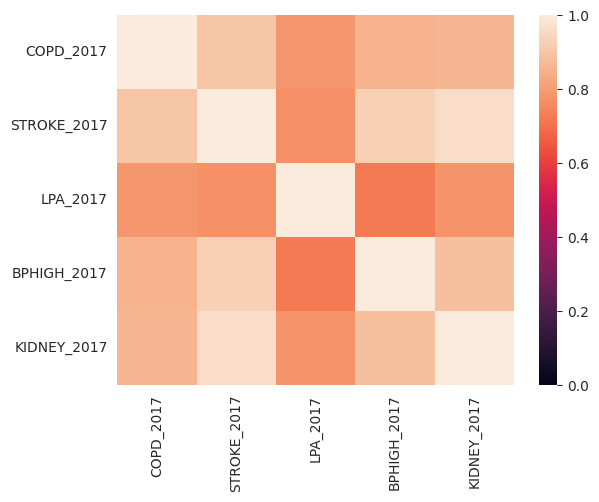

In [13]:
corr_map = training_data[cardiovascular_features].corr()
sns.heatmap(corr_map, vmin=0, vmax=1);